In [1]:
import pysal
import numpy as np
import random
import pandas as pd
import geopandas as gpd

%matplotlib inline

Read in the data from the .csv file and read in file with the .shp extension. You will use these for today. **The commands will below will not run as is; you will need to identify the proper file path.**

When you downloaded PySAL, you installed packages. Using the `pysal.examples.base` command may help in finding how to navigate to the dataset.

The `README.md` file shares this comment about the data:

Per-capita income for the lower 47 US states 1929-2010

In [2]:
us_join = pd.read_csv('/anaconda/lib/python2.7/site-packages/pysal/examples/us_income/usjoin.csv')

In [14]:
us_join.head()

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,323,267,224,162,166,211,217,251,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,Arizona,4,600,520,429,321,308,362,416,462,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,Arkansas,5,310,228,215,157,157,187,207,247,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,California,6,991,887,749,580,546,603,660,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,Colorado,8,634,578,471,354,353,368,444,542,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093


In [3]:
us_shapefile = gpd.read_file("/anaconda/lib/python2.7/site-packages/pysal/examples/us_income/us48.shp")

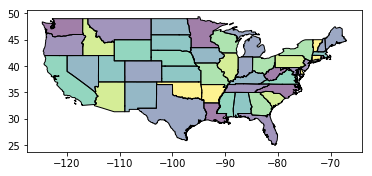

In [4]:
us_shapefile.plot()

## EDA

Conduct an exploratory data analysis toward the goal of building a model. You'll want to build out a space component and a time component to include in your model. Be creative!

In [18]:
len(list(us_shapefile.STATE_NAME.value_counts()))
## 48 states

48

In [22]:
len(list(us_shapefile.STATE_.value_counts()))

48

In [23]:
len(list(us_shapefile.STATE_ABBR.value_counts()))

48

In [25]:
len(list(us_shapefile.STATE_ID.value_counts()))

48

In [26]:
us_shapefile.SUB_REGION.value_counts()

S Atl      8
Mtn        8
W N Cen    7
N Eng      6
E N Cen    5
W S Cen    4
E S Cen    4
Pacific    3
Mid Atl    3
Name: SUB_REGION, dtype: int64

In [30]:
len(list(us_join.Name.value_counts()))

48

In [44]:
us

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2002,2003,2004,2005,2006,2007,2008,2009,STATE_NAME,geometry
0,Alabama,1,323,267,224,162,166,211,217,251,...,25161,26065,27665,29097,30634,31988,32819,32274,Alabama,POLYGON ((-85.07013702392578 31.98054504394531...
1,Arizona,4,600,520,429,321,308,362,416,462,...,26469,27106,28753,30671,32552,33470,33445,32077,Arizona,POLYGON ((-114.5198440551758 33.02766799926758...
2,Arkansas,5,310,228,215,157,157,187,207,247,...,23929,25074,26465,27512,29041,31070,31800,31493,Arkansas,"POLYGON ((-94.46147918701172 34.1966552734375,..."
3,California,6,991,887,749,580,546,603,660,771,...,32900,33801,35663,37463,40169,41943,42377,40902,California,(POLYGON ((-121.6641540527344 38.1693687438964...
4,Colorado,8,634,578,471,354,353,368,444,542,...,33963,34092,35543,37388,39662,41165,41719,40093,Colorado,POLYGON ((-102.0439987182617 37.64146041870117...
5,Connecticut,9,1024,921,801,620,583,653,706,806,...,42021,42398,45009,47022,51133,53930,54528,52736,Connecticut,POLYGON ((-73.53082275390625 41.52265167236328...
6,Delaware,10,1032,857,775,590,564,645,701,868,...,33463,34123,35998,37297,39358,40251,40698,40135,Delaware,POLYGON ((-75.70742034912109 38.55747604370117...
7,Florida,12,518,470,398,319,288,348,376,450,...,29499,30277,32462,34460,36934,37781,37808,36565,Florida,"(POLYGON ((-80.785888671875 28.78492546081543,..."
8,Georgia,13,347,307,256,200,204,244,268,302,...,28660,29060,29995,31498,32739,33895,34127,33086,Georgia,(POLYGON ((-85.13023376464844 31.7786903381347...
9,Idaho,16,507,503,374,274,227,403,399,475,...,25485,25912,27846,29003,30954,32168,32322,30987,Idaho,POLYGON ((-117.0253067016602 43.67914962768555...


In [ ]:
        us['Latitude'] = Point(pt).x
        us['Longitude'] = Point(pt).y

In [62]:
from shapely.geometry import Point
pts = []
for index, row in us.iterrows():
    for pt in list(row['geometry'].exterior.coords): 
        us['Latitude']=[z for z in Point(pt).y]

# nodes = nodes.append({'POLY_NUM_B': int(row['POLY_NUM_B']), 'Pb':row['Pb'],'Zn':row['Zn'], 'geometry':Point(pt) },ignore_index=True)
# nodes.head(5)        

TypeError: 'float' object is not iterable

In [37]:
geo = pd.DataFrame(us_shapefile[['STATE_NAME','geometry']])
us = us_join.merge(geo,left_on='Name',right_on='STATE_NAME')
us['Latitude']=

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2002,2003,2004,2005,2006,2007,2008,2009,STATE_NAME,geometry
0,Alabama,1,323,267,224,162,166,211,217,251,...,25161,26065,27665,29097,30634,31988,32819,32274,Alabama,POLYGON ((-85.07013702392578 31.98054504394531...
1,Arizona,4,600,520,429,321,308,362,416,462,...,26469,27106,28753,30671,32552,33470,33445,32077,Arizona,POLYGON ((-114.5198440551758 33.02766799926758...
2,Arkansas,5,310,228,215,157,157,187,207,247,...,23929,25074,26465,27512,29041,31070,31800,31493,Arkansas,"POLYGON ((-94.46147918701172 34.1966552734375,..."
3,California,6,991,887,749,580,546,603,660,771,...,32900,33801,35663,37463,40169,41943,42377,40902,California,(POLYGON ((-121.6641540527344 38.1693687438964...
4,Colorado,8,634,578,471,354,353,368,444,542,...,33963,34092,35543,37388,39662,41165,41719,40093,Colorado,POLYGON ((-102.0439987182617 37.64146041870117...
5,Connecticut,9,1024,921,801,620,583,653,706,806,...,42021,42398,45009,47022,51133,53930,54528,52736,Connecticut,POLYGON ((-73.53082275390625 41.52265167236328...
6,Delaware,10,1032,857,775,590,564,645,701,868,...,33463,34123,35998,37297,39358,40251,40698,40135,Delaware,POLYGON ((-75.70742034912109 38.55747604370117...
7,Florida,12,518,470,398,319,288,348,376,450,...,29499,30277,32462,34460,36934,37781,37808,36565,Florida,"(POLYGON ((-80.785888671875 28.78492546081543,..."
8,Georgia,13,347,307,256,200,204,244,268,302,...,28660,29060,29995,31498,32739,33895,34127,33086,Georgia,(POLYGON ((-85.13023376464844 31.7786903381347...
9,Idaho,16,507,503,374,274,227,403,399,475,...,25485,25912,27846,29003,30954,32168,32322,30987,Idaho,POLYGON ((-117.0253067016602 43.67914962768555...


In [33]:
us_join

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,323,267,224,162,166,211,217,251,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,Arizona,4,600,520,429,321,308,362,416,462,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,Arkansas,5,310,228,215,157,157,187,207,247,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,California,6,991,887,749,580,546,603,660,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,Colorado,8,634,578,471,354,353,368,444,542,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093
5,Connecticut,9,1024,921,801,620,583,653,706,806,...,40640,42279,42021,42398,45009,47022,51133,53930,54528,52736
6,Delaware,10,1032,857,775,590,564,645,701,868,...,31255,32664,33463,34123,35998,37297,39358,40251,40698,40135
7,Florida,12,518,470,398,319,288,348,376,450,...,28145,28852,29499,30277,32462,34460,36934,37781,37808,36565
8,Georgia,13,347,307,256,200,204,244,268,302,...,27940,28596,28660,29060,29995,31498,32739,33895,34127,33086
9,Idaho,16,507,503,374,274,227,403,399,475,...,24180,25124,25485,25912,27846,29003,30954,32168,32322,30987


In [32]:
us_shapefile

,AREA,PERIMETER,STATE_,STATE_ABBR,STATE_FIPS,STATE_ID,STATE_NAME,SUB_REGION,geometry
0,20.750,34.956,1,WA,53,1,Washington,Pacific,(POLYGON ((-122.400749206543 48.22539520263672...
1,45.132,34.527,2,MT,30,2,Montana,Mtn,POLYGON ((-111.4746322631836 44.70223999023438...
2,9.571,18.899,3,ME,23,3,Maine,N Eng,(POLYGON ((-69.77778625488281 44.0740737915039...
3,21.874,21.353,4,ND,38,4,North Dakota,W N Cen,POLYGON ((-98.73005676269531 45.93829727172852...
4,22.598,22.746,5,SD,46,5,South Dakota,W N Cen,POLYGON ((-102.7879333496094 42.99532318115234...
5,27.966,21.987,6,WY,56,6,Wyoming,Mtn,"POLYGON ((-104.053108215332 41.69824600219727,..."
6,16.477,21.891,7,WI,55,7,Wisconsin,E N Cen,(POLYGON ((-87.74845123291016 44.9616279602050...
7,24.391,28.529,8,ID,16,8,Idaho,Mtn,POLYGON ((-117.0253067016602 43.67914962768555...
8,2.794,8.450,9,VT,50,9,Vermont,N Eng,POLYGON ((-73.25850677490234 42.74597930908203...
9,25.577,29.510,10,MN,27,10,Minnesota,W N Cen,POLYGON ((-91.73021697998047 43.49960327148438...


In [31]:
us_join

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,323,267,224,162,166,211,217,251,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,Arizona,4,600,520,429,321,308,362,416,462,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,Arkansas,5,310,228,215,157,157,187,207,247,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,California,6,991,887,749,580,546,603,660,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,Colorado,8,634,578,471,354,353,368,444,542,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093
5,Connecticut,9,1024,921,801,620,583,653,706,806,...,40640,42279,42021,42398,45009,47022,51133,53930,54528,52736
6,Delaware,10,1032,857,775,590,564,645,701,868,...,31255,32664,33463,34123,35998,37297,39358,40251,40698,40135
7,Florida,12,518,470,398,319,288,348,376,450,...,28145,28852,29499,30277,32462,34460,36934,37781,37808,36565
8,Georgia,13,347,307,256,200,204,244,268,302,...,27940,28596,28660,29060,29995,31498,32739,33895,34127,33086
9,Idaho,16,507,503,374,274,227,403,399,475,...,24180,25124,25485,25912,27846,29003,30954,32168,32322,30987


## Build Model

Use space and time to predict income in 2009 across the nation. How you use space and time is up to you!

(Be careful about training/testing sets!)

## Interpret and Evaluate Model

What do your results mean?